In [990]:
from inputresolver import resolve, invert_edges, flatten_order, reassigneq, direct_eqs, flatten_and_transform_condensation, default_in_raw, eqvars, reassign, default_in
from representations import digraph_repr, draw_dsm, drawbipartite, draw, bipartite_repr

In [913]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
from notation import generate_execution, mapping

In [3]:
from testproblems import generate_random_prob

In [4]:
from random import Random, sample, randint
import random
import copy
import sympy as sp
import numpy as np
from functools import reduce
import networkx as nx

In [5]:
n_eqs = 10
n_vars = 13
seed = 8#seed 10 is nice
sparsity = 1.1 #1.7
eqv, varinc, dout = generate_random_prob(n_eqs, n_vars, seed, sparsity)

In [924]:
dout

{0: 19, 7: 15, 3: 10, 6: 17, 9: 20, 5: 13, 8: 18, 1: 11, 2: 14, 4: 12}

In [6]:
eqs=direct_eqs(eqv, dout)

In [7]:
D2, _ = digraph_repr(eqv, dout)
C = nx.condensation(D2)
order2 = [C.nodes[n]['members'] for n in nx.topological_sort(C)]
print(order2)

[{16}, {10}, {20}, {22}, {21}, {11, 12, 13, 14, 15, 17, 18, 19}]


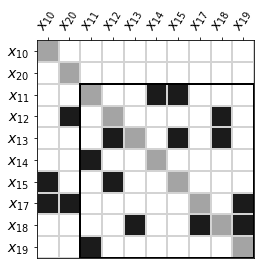

In [921]:
flattened_order = flatten_and_transform_condensation(order2, dout)
ax = draw_dsm(D2, flattened_order, dout, addvar=True);
rect1 = patches.Rectangle((2,2), 8, 8, linewidth=2, edgecolor='k', facecolor='none')
ax.add_patch(rect1)

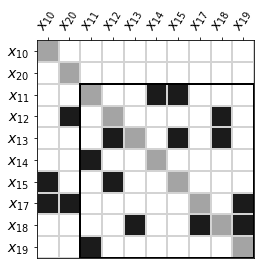

In [923]:
plt.sca(ax)
plt.savefig('figures/dsm_originalM.png', dpi=600, bbox_inches='tight')

In [994]:
from collections import OrderedDict

In [9]:
din = default_in_raw(eqs)
din

{16, 21, 22}

In [10]:
eqv

{0: (11, 19),
 1: (14, 15, 21, 22, 11),
 2: (11, 14),
 3: (10,),
 4: (18, 20, 12),
 5: (12, 15, 18, 22, 13),
 6: (10, 19, 20, 22, 17),
 7: (10, 12, 15),
 8: (13, 16, 17, 19, 18),
 9: (20,)}

# Generate test problem equations

In [375]:
vrs = varinc.keys()

In [13]:
sdict = {elt:sp.Symbol('x_{}'.format(elt)) for elt in vrs}

In [366]:
from functools import reduce
import operator

In [11]:
rng = np.random.default_rng(12345)
def smallrand(n=1):
    newn = np.round(rng.uniform(low=-1, high=1),n)
    if newn == 0.:
        return smallrand()
    return newn

In [362]:
def generate_partitions(vrs):
    rvrs = copy.copy(list(vrs))
    rng.shuffle(rvrs)
    p = []
    while len(rvrs) >= 3:
        ri = rng.integers(2,4)
        p.append((smallrand(), rvrs[:ri]))
        rvrs = rvrs[ri:]
    if rvrs:
        p.append((smallrand(), rvrs))
    return p

In [371]:
partitions = {idx:generate_partitions(eqvars) for idx,eqvars in eqv.items()}

In [381]:
reseqs = {idx: sum([key*reduce(operator.mul, (sdict[var] for var in val)) for key, val in partitions[idx]])+smallrand() for idx,eqvars in eqv.items()}

In [382]:
reseqs

{0: 0.3*x_11*x_19 + 0.5,
 1: -0.1*x_11*x_21*x_22 - 0.1*x_14*x_15 + 1.0,
 2: -1.0*x_11*x_14 + 0.1,
 3: 0.6*x_10 + 0.9,
 4: 0.2*x_12*x_18 + 0.6*x_20 + 0.9,
 5: 0.1*x_12*x_13*x_22 + 0.5*x_15*x_18 - 0.6,
 6: -0.8*x_10*x_17 - 0.1*x_19*x_20*x_22 - 0.9,
 7: 0.5*x_10*x_15 - 0.8*x_12 - 0.7,
 8: -0.2*x_13*x_17 - 0.1*x_16*x_19 - 0.9*x_18 + 0.5,
 9: 0.2*x_20 - 0.5}

## Old code for generation

In [376]:
def use_inputs(vrs, din):
    dins = din.intersection(vrs)
    others = set(vrs)-dins
    dins = [None]+list(dins)
    for elt in vrs:
        if dins:
            yield (smallrand(), dins.pop())
        else:
            yield (smallrand(), None)  #sample(others-{elt}, 1)[0] if len(others)>1 else None  

In [377]:
#list(use_inputs((14, 15, 21, 22, 11), din))

In [378]:
#data = {idx:list(use_inputs(eqvars,din)) for idx,eqvars in eqv.items()}

In [379]:
#reseqs = {key: sum([data[key][idx][0]*(sdict[var]-1)*(sdict[data[key][idx][1]] if data[key][idx][1] in sdict else 1) for idx,var in enumerate(eqvars) if var not in din]) for key,eqvars in eqv.items()}

### For polynomial testing eqs

In [495]:
print('@var {}'.format(", ".join(['x_{}'.format(vr) for vr in vrs])))
print('@var λ[1:{}];'.format(n_eqs))
for key, var in reseqs.items():
    print('h{}={};'.format(key, var))
print('vars=[{}]'.format(", ".join(['x_{}'.format(vr) for vr in vrs])))
print('dfdx=[{}]'.format(", ".join([str(0) if vr not in [16, 22, 21] else 'x_{}'.format(vr) for vr in vrs])))
print('h=[{}];'.format(", ".join(['h{}'.format(eq) for eq in reseqs.keys()])))

@var x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20, x_21, x_22
@var λ[1:10];
h0=0.3*x_11*x_19 + 0.5;
h1=-0.1*x_11*x_21*x_22 - 0.1*x_14*x_15 + 1.0;
h2=-1.0*x_11*x_14 + 0.1;
h3=0.6*x_10 + 0.9;
h4=0.2*x_12*x_18 + 0.6*x_20 + 0.9;
h5=0.1*x_12*x_13*x_22 + 0.5*x_15*x_18 - 0.6;
h6=-0.8*x_10*x_17 - 0.1*x_19*x_20*x_22 - 0.9;
h7=0.5*x_10*x_15 - 0.8*x_12 - 0.7;
h8=-0.2*x_13*x_17 - 0.1*x_16*x_19 - 0.9*x_18 + 0.5;
h9=0.2*x_20 - 0.5;
vars=[x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20, x_21, x_22]
dfdx=[0, 0, 0, 0, 0, 0, x_16, 0, 0, 0, 0, x_21, x_22]
h=[h0, h1, h2, h3, h4, h5, h6, h7, h8, h9];


In [447]:
rev_lookup = {var:key for key,var in dout.items()}

In [448]:
eqsfull = {idx: (sdict[dout[idx]], sp.simplify(reassigneq(None, eq, sdict[dout[idx]]))) for idx,eq in reseqs.items()}


In [449]:
eqsfull

{0: (x_19, -1.66666666666667/x_11),
 1: (x_11, (-x_14*x_15 + 10.0)/(x_21*x_22)),
 2: (x_14, 0.1/x_11),
 3: (x_10, -1.50000000000000),
 4: (x_12, -(3.0*x_20 + 4.5)/x_18),
 5: (x_13, (-5.0*x_15*x_18 + 6.0)/(x_12*x_22)),
 6: (x_17, -(0.125*x_19*x_20*x_22 + 1.125)/x_10),
 7: (x_15, (1.6*x_12 + 1.4)/x_10),
 8: (x_18,
  -0.222222222222222*x_13*x_17 - 0.111111111111111*x_16*x_19 + 0.555555555555556),
 9: (x_20, 2.50000000000000)}

## Workflow 1

In [675]:
import openmdao.api as om
from notationcompute import optsolver, solver, explicit
from compute import buildidpvars, Expcomp, Evaluable

In [676]:
order2

[{16}, {10}, {20}, {22}, {21}, {11, 12, 13, 14, 15, 17, 18, 19}]

In [677]:
def scc_workflow(order, rev_lookup, sdict):
    for sccelt in order:
        if len(sccelt) == 1:
            var = next(iter(sccelt))
            if var in rev_lookup:
                yield (sdict[var], rev_lookup[var])
        else:
            yield tuple(list(elt) for elt in zip(*[(sdict[var],rev_lookup[var]) for var in sccelt]))

In [678]:
notation = list(scc_workflow(order2, rev_lookup, sdict))

In [679]:
order = generate_execution(notation)

In [680]:
order

[('exp', 0, x_10, 3),
 ('exp', 0, x_20, 9),
 ('solver',
  0,
  1,
  [x_11, x_12, x_13, x_14, x_15, x_17, x_18, x_19],
  [1, 4, 5, 2, 7, 6, 8, 0])]

In [681]:
optin = {key:(None, val) for key,val in reseqs.items()}
optin['f'] = (None, (sdict[12]-1)**2+(sdict[17]-1)**2+(sdict[19]-1)**2)

In [964]:
prob = om.Problem()
model = prob.model
groups = {0:model}

In [965]:
buildidpvars(['x_{}'.format(elt) for elt in din], model)
#buildidpvars(['x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_17', 'x_18', 'x_19']+['x_{}'.format(elt) for elt in din], model)

In [966]:
for elt in order:
    if elt[0] == 'exp':
        _,parent_id, vout, eqid = elt
        explicit(groups, eqsfull, parent_id, vout, eqid)
    if elt[0] == 'solver':
        _,parent_id, child_id, solvevars, res = elt
        solver(groups, optin, parent_id, parent_id, solvevars, res)
        #optsolver(groups, optin, parent_id, parent_id, solvevars+['x_{}'.format(elt) for elt in din], ([],res,['f']))
optsolver(groups, optin, 0, 0, ['x_{}'.format(elt) for elt in din], ([],[],['f']))

In [979]:
prob.setup();

In [980]:
# for elt in ['x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_17', 'x_18', 'x_19']:
#     prob.set_val(elt,np.random.randint(-10,10))

In [981]:
for elt in ['x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_17', 'x_18', 'x_19', 'x_16', 'x_21', 'x_22']:
    prob.set_val(elt,10*optres[elt])

In [982]:
prob.set_solver_print(level=1)
prob.driver = om.ScipyOptimizeDriver()
# prob.driver.options['optimizer'] = 'differential_evolution'
prob.driver.options['maxiter'] = 300 
prob.run_driver();


group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: Newton Converged in 5 iterations

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: Newton Converged in 13 iterations

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed to converge in 20 iterations.

group0
NL: NewtonSolver 'NL: Newton' on system 'group0' failed

In [974]:
model.list_outputs();

6 Explicit Output(s) in 'model'

varname  val             
-------  ----------------
inp
  x_16   [306.02994936]  
  x_21   [-4.98485971]   
  x_22   [1.1874655]     
eq3
  x_10   [-1.5]          
eq9
  x_20   [2.5]           
group0
  eqf
    f0f  [1.94470283e-05]


8 Implicit Output(s) in 'model'

varname        val           
-------------  --------------
group0
  res14527680
    x_11       [-1.66916396] 
    x_12       [0.99711567]  
    x_13       [-96.41730568]
    x_14       [-0.05991023] 
    x_15       [-1.99692338] 
    x_17       [0.99701852]  
    x_18       [-12.03471212]
    x_19       [0.99850387]  




# Workflow 2

In [645]:
newdout = {0: 11, 1: 21, 2: 14, 3: 10, 4: 18, 5: 13, 6: 22, 7: 15, 8: 16, 9: 20}
nrev_lookup = {var:key for key,var in newdout.items()}

In [646]:
newdout

{0: 11, 1: 21, 2: 14, 3: 10, 4: 18, 5: 13, 6: 22, 7: 15, 8: 16, 9: 20}

In [647]:
neqsfull = {idx: (sdict[newdout[idx]], sp.simplify(reassigneq(None, eq, sdict[newdout[idx]]))) for idx,eq in reseqs.items()}

In [648]:
neqsfull

{0: (x_11, -1.66666666666667/x_19),
 1: (x_21, (-x_14*x_15 + 10.0)/(x_11*x_22)),
 2: (x_14, 0.1/x_11),
 3: (x_10, -1.50000000000000),
 4: (x_18, -(3.0*x_20 + 4.5)/x_12),
 5: (x_13, (-5.0*x_15*x_18 + 6.0)/(x_12*x_22)),
 6: (x_22, -(8.0*x_10*x_17 + 9.0)/(x_19*x_20)),
 7: (x_15, (1.6*x_12 + 1.4)/x_10),
 8: (x_16, (-2.0*x_13*x_17 - 9.0*x_18 + 5.0)/x_19),
 9: (x_20, 2.50000000000000)}

In [649]:
nraweqs=direct_eqs(eqv, newdout)
default_in_raw(nraweqs)

{12, 17, 19}

In [650]:
D3, _ = digraph_repr(eqv, newdout)
C3 = nx.condensation(D3)
order3 = [C3.nodes[n]['members'] for n in nx.topological_sort(C3)]
print(order3)

[{17}, {10}, {12}, {15}, {20}, {18}, {19}, {22}, {13}, {16}, {11}, {14}, {21}]


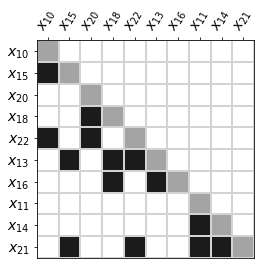

In [947]:
rlookup = {var:key for key,var in newdout.items()}
flattenorder = [rlookup[elt] for s in order3 for elt in s if elt in rlookup]
ax = draw_dsm(D3, flattenorder, newdout, addvar=True);
plt.sca(ax)
plt.savefig('figures/dsm_optimstructM.png', dpi=600, bbox_inches='tight')

In [651]:
class Expcomp(om.ExplicitComponent):
    def initialize(self):
        self.options.declare('equation')
        self.options.declare('output_name')
        self.options.declare('debug')

    def setup(self):
        equation = self.options['equation']
        output_name = self.options['output_name']
        self.add_output(output_name, val=0.1)
        for name in equation.input_names:
            self.add_input(name, val=0.1) # add them in the order we lambdify
        self.declare_partials(output_name, equation.input_names)
            
    def compute(self, inputs, outputs):
        equation = self.options['equation']
        output_name = self.options['output_name']
        debug = self.options['debug']
        outputs[output_name] = equation.evaldict(inputs)
        if debug:
            print(output_name, outputs[output_name])

    def compute_partials(self, inputs, partials, discrete_inputs=None):
        equation = self.options['equation']
        output_name = self.options['output_name']
        J = equation.graddict(inputs)
        for idx, input_name in enumerate(equation.input_names):
            partials[output_name,input_name] = J[idx]

In [652]:
def explicit(groups, eqs, parentid, var, eqn):
    cmp = Expcomp(output_name=str(var), equation=Evaluable.fromsympy(eqs[eqn][1]), debug=False)
    parent = groups[parentid]
    parent.add_subsystem("eq{}".format(eqn), cmp, promotes=['*'])

In [653]:
def optsolver(groups, eqs, parentid, childid, solvevars, res):
    parent = groups[parentid]
    childid= 0
    child = groups[childid]# = parent.add_subsystem('group{}'.format(childid), 
        #om.Group(), promotes=['*'])
    for vr in solvevars:
        child.add_design_var(str(vr))
    ineqlts, eqlts, obj = res
    constraintnames = {
        'g{}'.format(childid): (ineqlts, {'upper':0.}),
        'h{}'.format(childid): (eqlts, {'upper':0., 'lower':0.}),
        'f{}'.format(childid): (obj, 'obj'),
    }
    for constraintname, (equations, bnd) in constraintnames.items():
        for eqn in equations:
            outname = constraintname+str(eqn)
            cmp = Expcomp(output_name=outname, equation=Evaluable.fromsympy(eqs[eqn][1]), debug=False)
            child.add_subsystem("eq{}".format(eqn), cmp, promotes=['*'])
            if bnd != 'obj':
                print('adding constraint')
                child.add_constraint('{}{}'.format(constraintname, eqn), **bnd)
            else:
                child.add_objective(outname)

In [937]:
prob = om.Problem()
model = prob.model
groups = {0:model}

In [938]:
solvefor = ['x_12', 'x_17', 'x_19']
scceqs = [3, 7, 9, 4, 6, 5, 8, 0, 2, 1]
buildidpvars(solvefor, model)
for idx in scceqs:
    explicit(groups, neqsfull, 0, neqsfull[idx][0], idx)
optsolver(groups, optin, 0, 1, solvefor, ([],[],['f']))

In [939]:
prob.setup();

In [940]:
for elt in ['x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_17', 'x_18', 'x_19', 'x_16', 'x_21', 'x_22']:
    prob.set_val(elt,100*optres[elt])

In [740]:
for elt in ['x_12', 'x_17','x_19']:
    prob.set_val(elt,np.random.randint(-500,500))

In [741]:
for elt in ['x_21','x_16','x_22','x_11', 'x_13', 'x_14', 'x_15', 'x_18']:
    prob.set_val(elt,np.random.randint(-100,100))

In [742]:
# prob.set_val('x_12', -42.7)
# prob.set_val('x_17', 0.7499595596608876)
# prob.set_val('x_19', -0.0002)

In [743]:
model.list_outputs();

14 Explicit Output(s) in 'model'

varname  val         
-------  ------------
inp
  x_12   [0.22199317]
  x_17   [0.87073231]
  x_19   [0.20671916]
eq3
  x_10   [1.]        
eq7
  x_15   [1.]        
eq9
  x_20   [1.]        
eq4
  x_18   [1.]        
eq6
  x_22   [1.]        
eq5
  x_13   [1.]        
eq8
  x_16   [1.]        
eq0
  x_11   [1.]        
eq2
  x_14   [1.]        
eq1
  x_21   [1.]        
eqf
  f0f    [1.]        


0 Implicit Output(s) in 'model'




In [744]:
prob.run_model()

In [941]:
prob.set_solver_print(level=1)
prob.driver = om.ScipyOptimizeDriver()
prob.driver.options['maxiter'] = 300 
prob.run_driver();

Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.]
            Iterations: 2
            Function evaluations: 3
            Gradient evaluations: 2
Optimization Complete
-----------------------------------


In [746]:
optres = {key: prob.get_val(key)[0] for key in ['x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_17', 'x_18', 'x_19', 'x_16', 'x_21', 'x_22']}

In [747]:
optres

{'x_11': -1.66666666666667,
 'x_12': 1.0,
 'x_13': -95.0,
 'x_14': -0.05999999999999988,
 'x_15': -2.0,
 'x_17': 1.0,
 'x_18': -12.0,
 'x_19': 1.0,
 'x_16': 303.0,
 'x_21': -4.939999999999991,
 'x_22': 1.2}